In [1]:
import tensorflow as tf
%env CUDA_VISIBLE_DEVICES=[]

env: CUDA_VISIBLE_DEVICES=[]


In [2]:
import pandas as pd
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import tensorflow as tf

In [649]:
??input_data

In [149]:
%matplotlib inline

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print(type(mnist.train.images))
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

<class 'numpy.ndarray'>
(55000, 784)
(55000, 10)


In [230]:
# data placeholder
x = tf.placeholder(tf.float32, [None, 784])

# weights and bias
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# logits
y = tf.matmul(x, W) + b

# placeholder for correct labels
y_ = tf.placeholder(tf.float32, [None, 10])

In [6]:
labels_hat = tf.cast(tf.argmax(y, axis=1), tf.float32)
labels = tf.cast(tf.argmax(y_, axis=1), tf.float32)

In [7]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(labels_hat, labels), tf.float32))

In [8]:
loss = tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_)
train_step = tf.train.AdamOptimizer().minimize(loss)

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
test_accs = []

In [12]:
for i in range(300):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    test_xs, test_ys = mnist.test.next_batch(200)
    test_accs.append(sess.run(accuracy, feed_dict={x: test_xs, y_: test_ys}))

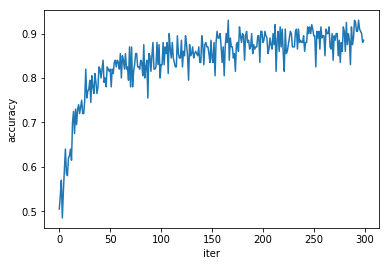

In [14]:
plt.plot(test_accs)
plt.xlabel('iter')
plt.ylabel('accuracy')
plt.show()

### See what happens when we apply random shift

In [284]:
def shift_flattened_pic(pic, max_margin=8):
    """ Apply random shift to a flattened pic
    
    Args:
        pic: ndarray of shape=(784) representing a pic to be flattened
    Return:
        flattened shifted pic
    """
    squared = pic.reshape(28, 28)
    padded = np.pad(squared, pad_width=[[max_margin, max_margin], [max_margin, max_margin]], 
                    mode='minimum')
    left_lower = np.random.randint(2 * max_margin, size=2)
    slicing = (slice(left_lower[0], left_lower[0] + 28),
               slice(left_lower[1], left_lower[1] + 28))
    return padded[slicing]

In [ ]:
test_xs_shifted = shift_flattened_pic(test_xs[10])

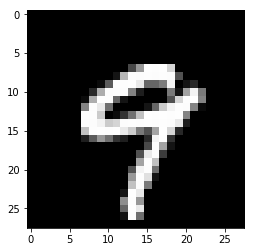

In [156]:
plt.imshow(test_xs[10].reshape(28, 28), cmap=plt.cm.gray)

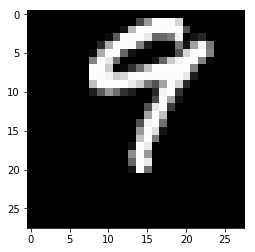

In [152]:
plt.imshow(test_xs_shifted, cmap=plt.cm.gray)
plt.show()

In [157]:
print(sess.run(tf.nn.softmax(y), feed_dict={x: test_xs[10s].reshape(1, -1)}))

[[  2.22541881e-03   7.59629111e-05   9.89836408e-05   4.75058070e-04
    2.78706700e-02   1.75558985e-03   1.45220745e-03   1.80749279e-02
    2.78136367e-03   9.45189834e-01]]


In [158]:
print(sess.run(tf.nn.softmax(y), feed_dict={x: test_xs_shifted.reshape(1, -1)}))

[[ 0.00454157  0.0584106   0.28294206  0.07451871  0.03695512  0.02815656
   0.04776794  0.41638133  0.02282464  0.02750149]]
